In [1]:
import os
import torch
import torch.nn as nn
from lion_pytorch import Lion
import torchvision.transforms as transforms
import torch.optim as optim
from th import coatnet, CNNModel, trainer, loader, plot, evaluator

In [2]:
#HyperParameters
img_size = (224, 224)
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
optimizer_class = Lion
criterion = nn.BCELoss()
learning_rate = 1e-4
num_epochs = 10

In [3]:
#Basic CNN Model Build
cnn_model = CNNModel(img_size=img_size).to(device)
cnn_model_path = os.path.join("pths", f"stroke_detection_model_{cnn_model.__class__.__name__}.pth")

In [4]:
#Data load
data_dir = "dataset"
test_dir = "test_dataset"

#train_loader, val_loader = loader(data_dir, transform=transform, split_ratio=0.8, batch_size=batch_size, shuffle=True)
train_loader = loader(data_dir, transform=transform, batch_size=batch_size, shuffle=True)

test_loader_head_ct = loader(os.path.join(test_dir, "head_ct"), transform=transform, batch_size=batch_size, shuffle=False)
test_loader_brain_ct = loader(os.path.join(test_dir, "brain_ct"), transform=transform, batch_size=batch_size, shuffle=False)
head_ct_samples, brain_ct_samples = len(test_loader_head_ct.dataset), len(test_loader_brain_ct.dataset)
total_samples = head_ct_samples + brain_ct_samples

val_loader = torch.utils.data.DataLoader(
    torch.utils.data.ConcatDataset([test_loader_head_ct.dataset, test_loader_brain_ct.dataset]),
    batch_size=batch_size, shuffle=False
)

In [5]:
#Train the CNN model
cnn_train_metrics = trainer(cnn_model, train_loader, val_loader, num_epochs, 
                            criterion, optimizer_class, learning_rate, 
                            model_path=cnn_model_path, device=device)

Epoch 1/10, Training Loss: 0.5198, Training Accuracy: 74.59%, Training F1 Score: 0.8219, Validation Loss: 0.7670, Validation Accuracy: 60.15%, Validation F1 Score: 0.6656
Epoch 2/10, Training Loss: 0.3255, Training Accuracy: 86.63%, Training F1 Score: 0.8995, Validation Loss: 1.0786, Validation Accuracy: 63.24%, Validation F1 Score: 0.7200
Epoch 3/10, Training Loss: 0.1643, Training Accuracy: 93.29%, Training F1 Score: 0.9491, Validation Loss: 1.4231, Validation Accuracy: 56.32%, Validation F1 Score: 0.6491
Epoch 4/10, Training Loss: 0.0753, Training Accuracy: 97.38%, Training F1 Score: 0.9801, Validation Loss: 2.2850, Validation Accuracy: 58.14%, Validation F1 Score: 0.6573
Epoch 5/10, Training Loss: 0.0526, Training Accuracy: 98.08%, Training F1 Score: 0.9854, Validation Loss: 3.6867, Validation Accuracy: 62.30%, Validation F1 Score: 0.7241
Epoch 6/10, Training Loss: 0.0390, Training Accuracy: 98.73%, Training F1 Score: 0.9903, Validation Loss: 7.6607, Validation Accuracy: 57.59%, Va

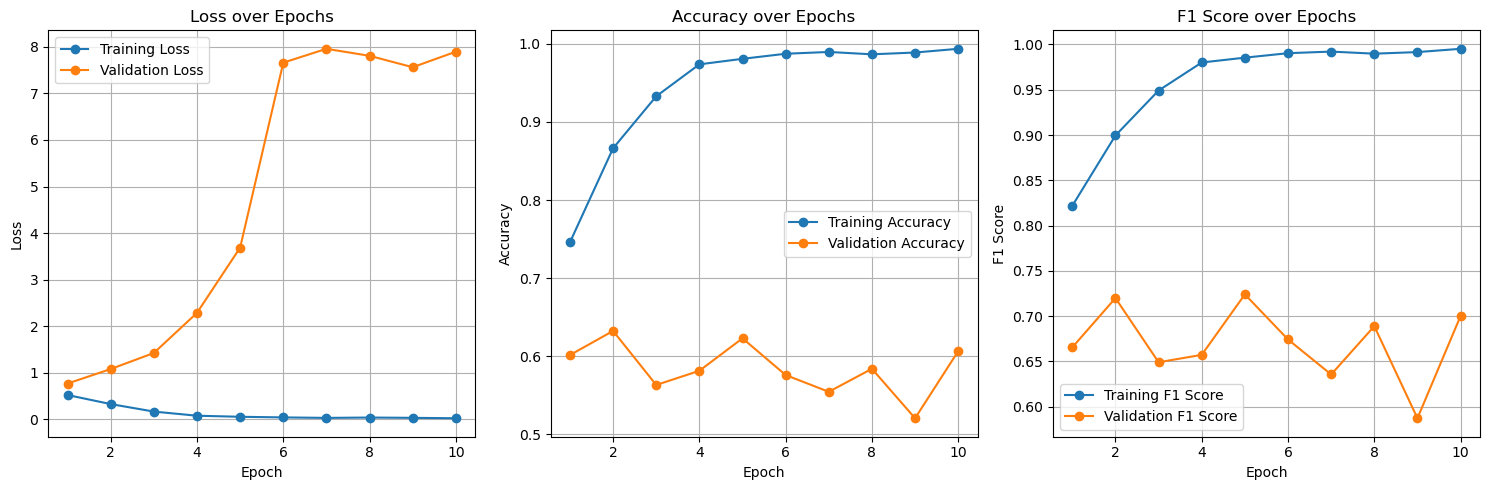

In [6]:
#Plot the CNN model metrics
plot(*cnn_train_metrics)

In [8]:
# Evaluate the CNN model
cnn_metrics = {
    "Head CT": evaluator(cnn_model, test_loader_head_ct, criterion, device),
    "Brain CT": evaluator(cnn_model, test_loader_brain_ct, criterion, device)
}

cnn_total_accuracy = sum(cnn_metrics[key][1] * samples for key, samples in 
                         zip(["Head CT", "Brain CT"], [head_ct_samples, brain_ct_samples])) / total_samples
cnn_total_f1 = sum(cnn_metrics[key][2] * samples for key, samples in 
                   zip(["Head CT", "Brain CT"], [head_ct_samples, brain_ct_samples])) / total_samples

# Print results
for key, (loss, accuracy, f1) in cnn_metrics.items():
    print(f'{key} - Accuracy: {accuracy * 100:.2f}%, F1 Score: {f1 * 100:.2f}%')

print(f'Total - Accuracy: {cnn_total_accuracy * 100:.2f}%, F1 Score: {cnn_total_f1 * 100:.2f}%')

Head CT - Accuracy: 53.00%, F1 Score: 24.19%
Brain CT - Accuracy: 60.88%, F1 Score: 70.65%
Total - Accuracy: 60.65%, F1 Score: 69.32%


In [9]:
#CoAtNet Build
coatnet_model = coatnet(image_size=img_size, num_classes=1).to(device)
coatnet_model_path = f"stroke_detection_model_{coatnet_model.__class__.__name__}.pth"

c:\Users\silba\anaconda3\envs\dreamer\lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [10]:
#Train the CoAtNet model
coatnet_train_metrics = trainer(coatnet_model, train_loader, val_loader, num_epochs, 
                                criterion, optimizer_class, learning_rate, 
                                model_path=coatnet_model_path, device=device)

Epoch 1/10, Training Loss: 0.5544, Training Accuracy: 73.95%, Training F1 Score: 0.8098, Validation Loss: 0.8860, Validation Accuracy: 58.04%, Validation F1 Score: 0.5462
Epoch 2/10, Training Loss: 0.3060, Training Accuracy: 87.62%, Training F1 Score: 0.9072, Validation Loss: 0.9497, Validation Accuracy: 71.93%, Validation F1 Score: 0.7918
Epoch 3/10, Training Loss: 0.2117, Training Accuracy: 91.95%, Training F1 Score: 0.9393, Validation Loss: 0.8730, Validation Accuracy: 72.66%, Validation F1 Score: 0.8057
Epoch 4/10, Training Loss: 0.1493, Training Accuracy: 94.34%, Training F1 Score: 0.9572, Validation Loss: 1.0786, Validation Accuracy: 69.40%, Validation F1 Score: 0.7599
Epoch 5/10, Training Loss: 0.1171, Training Accuracy: 95.58%, Training F1 Score: 0.9664, Validation Loss: 1.2262, Validation Accuracy: 70.13%, Validation F1 Score: 0.7809
Epoch 6/10, Training Loss: 0.0954, Training Accuracy: 96.48%, Training F1 Score: 0.9733, Validation Loss: 1.0546, Validation Accuracy: 69.32%, Va

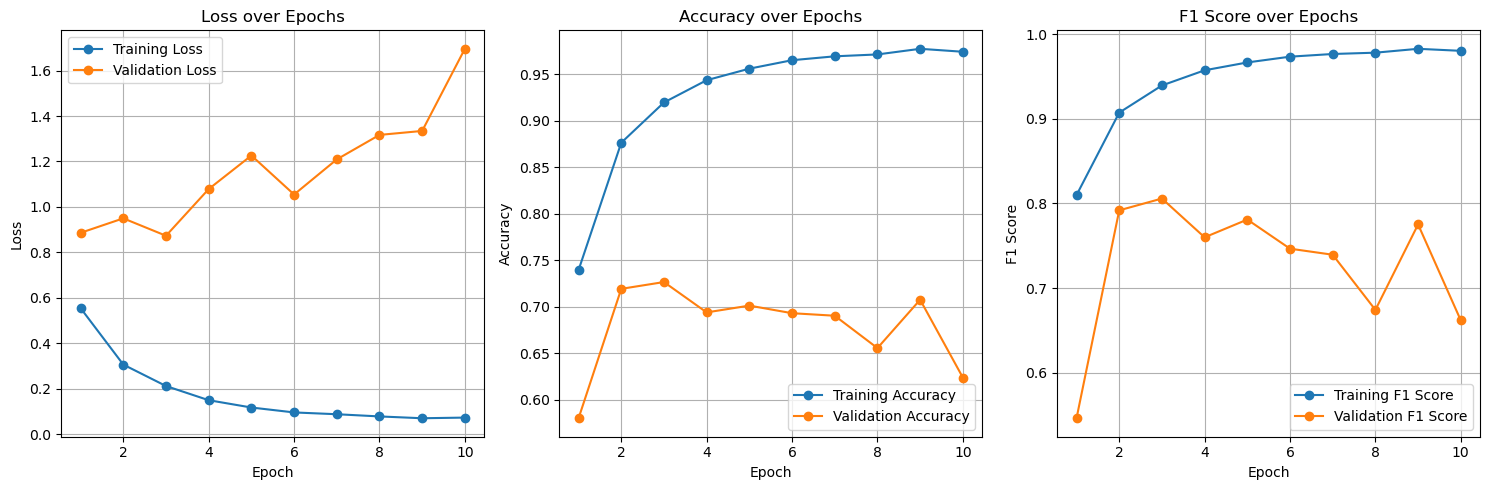

In [11]:
#Plot the CoAtNet model metrics
plot(*coatnet_train_metrics)

In [12]:
# Evaluate the CoAtNet model
coatnet_metrics = {
    "Head CT": evaluator(coatnet_model, test_loader_head_ct, criterion, device),
    "Brain CT": evaluator(coatnet_model, test_loader_brain_ct, criterion, device),
}

coatnet_total_accuracy = sum(coatnet_metrics[key][1] * samples for key, samples in 
                             zip(["Head CT", "Brain CT"], [head_ct_samples, brain_ct_samples])) / total_samples
coatnet_total_f1 = sum(coatnet_metrics[key][2] * samples for key, samples in 
                       zip(["Head CT", "Brain CT"], [head_ct_samples, brain_ct_samples])) / total_samples

# Print results
for key, (loss, accuracy, f1) in coatnet_metrics.items():
    print(f'CoAtNet {key} - Accuracy: {accuracy * 100:.2f}%, F1 Score: {f1 * 100:.2f}%')

print(f'CoAtNet Total - Accuracy: {coatnet_total_accuracy * 100:.2f}%, F1 Score: {coatnet_total_f1 * 100:.2f}%')

CoAtNet Head CT - Accuracy: 51.00%, F1 Score: 7.55%
CoAtNet Brain CT - Accuracy: 62.75%, F1 Score: 66.99%
CoAtNet Total - Accuracy: 62.41%, F1 Score: 65.29%
